Middle Band (MA): This is the simple moving average (SMA) of the closing prices over a specified period. A common choice is a 20-period SMA.
Upper Band (UB): This is the sum of the 20-period SMA and two times the 20-period standard deviation (SD) of the closing prices.
Lower Band (LB): This is the 20-period SMA minus two times the 20-period SD of the closing prices.

BREAKOUTS

The Bollinger Band Breakout strategy involves entering a trade when the price breaks through the upper or lower bands, signaling a potential continuation of the current trend. Traders can establish long positions when the price breaks above the upper band and short positions when it breaks below the lower band. To manage risk, traders can place stop-loss orders just below or above the breakout point.

WALKS

The Bollinger Band Walk strategy occurs when the price “walks” along the upper or lower band during a strong trend, offering traders multiple entry and exit points. In an uptrend, traders can enter long positions when the price bounces off the upper band and exit when it moves below the middle band. In a downtrend, traders can enter short positions when the price bounces off the lower band and exit when it moves above the middle band.

c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


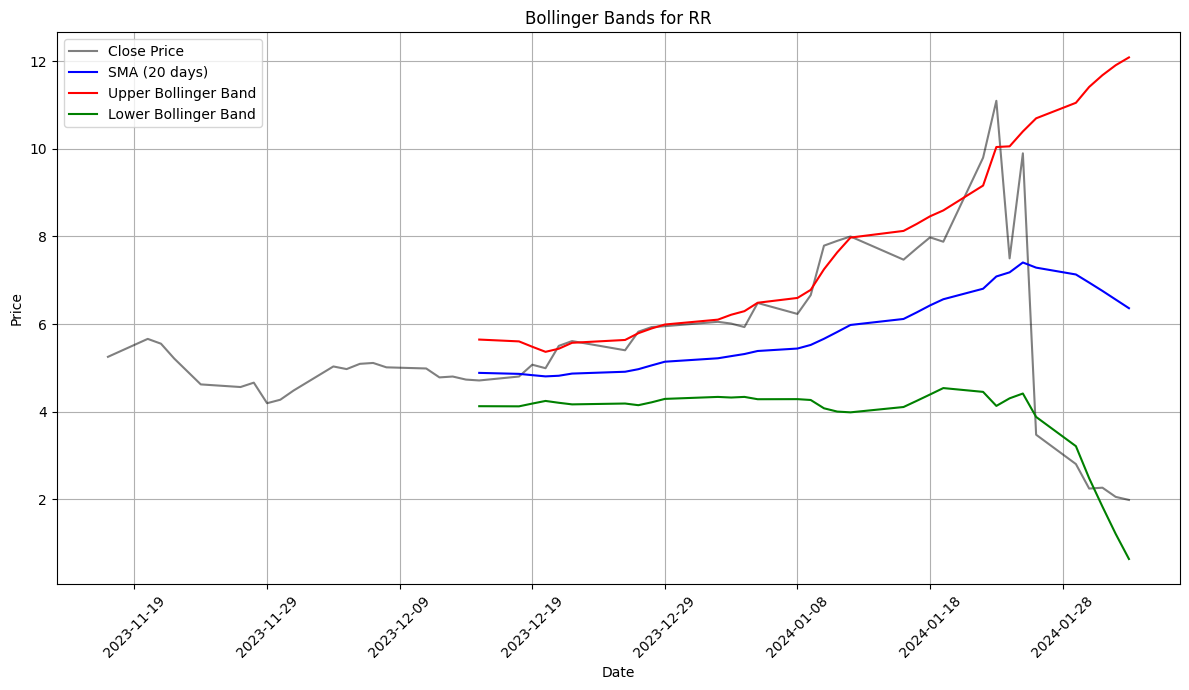

Last Closing Price: 1.9800000190734863


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

pd.set_option('display.max_rows', None)

# Define the ticker symbol and the timeframe
ticker_symbol = "RR"  # Replace this with your desired stock symbol
start_date = "2020-11-01"
end_date = "2024-02-03"

# Fetch stock data using yfinance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the Simple Moving Average (SMA)
sma_window = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=sma_window).mean()

# Calculate the Bollinger Bands
std_dev_window = 20  # adjust this window size as needed
stock_data['Std_Dev'] = stock_data['Close'].rolling(window=std_dev_window).std()
stock_data['Upper_Band'] = stock_data['SMA'] + (stock_data['Std_Dev'] * 2)
stock_data['Lower_Band'] = stock_data['SMA'] - (stock_data['Std_Dev'] * 2)

# Reset index to make 'Date' a column
stock_data = stock_data.reset_index()

# Plotting the data
plt.figure(figsize=(12, 7))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='black', alpha=0.5)
plt.plot(stock_data['Date'], stock_data['SMA'], label='SMA (20 days)', color='blue')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Bollinger Band', color='red')
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Bollinger Band', color='green')
plt.fill_between(stock_data['Date'], stock_data['Upper_Band'], stock_data['Lower_Band'], color='white', alpha=0.4)
plt.title('Bollinger Bands for ' + ticker_symbol)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Formatting x-axis date ticks
date_format = DateFormatter("%Y-%m-%d")  # Customize the date format as desired
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of ticks as needed
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
plt.tight_layout()  # Adjust layout for better display of labels

# Show the plot
plt.show()

# Print out the last closing price
last_close_price = stock_data['Close'].iloc[-1]
print(f"Last Closing Price: {last_close_price}")




In [2]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

pd.set_option('display.max_rows', None)

# Define the ticker symbol and the timeframe
ticker_symbol = "RR"  # Replace this with your desired stock symbol
start_date = "2020-11-01"
end_date = "2024-02-03"

# Fetch stock data using yfinance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the Simple Moving Average (SMA)
sma_window = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=sma_window).mean()

# Calculate the Bollinger Bands
std_dev_window = 20  # adjust this window size as needed
stock_data['Std_Dev'] = stock_data['Close'].rolling(window=std_dev_window).std()
stock_data['Upper_Band'] = stock_data['SMA'] + (stock_data['Std_Dev'] * 2)
stock_data['Lower_Band'] = stock_data['SMA'] - (stock_data['Std_Dev'] * 2)

# Create a Plotly figure
fig = go.Figure()

# Plotting the data
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Close Price', line=dict(color='black', opacity=0.5)))
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['SMA'], mode='lines', name='SMA (20 days)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Upper_Band'], mode='lines', name='Upper Bollinger Band', line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Lower_Band'], mode='lines', name='Lower Bollinger Band', line=dict(color='green')))

# Fill the area between upper and lower bands
fig.add_trace(go.Scatter(x=stock_data['Date'].append(stock_data['Date'][::-1]),
                         y=stock_data['Upper_Band'].append(stock_data['Lower_Band'][::-1]),
                         fill='toself',
                         fillcolor='rgba(255, 255, 255, 0.4)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         showlegend=False))

# Set layout options
fig.update_layout(title=f'Bollinger Bands for {ticker_symbol}',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  legend=dict(x=0, y=1),
                  xaxis=dict(type='category'),
                  xaxis_rangeslider_visible=True)

# Show the plot
fig.show()

# Print out the last closing price
last_close_price = stock_data['Close'].iloc[-1]
print(f"Last Closing Price: {last_close_price}")


c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


KeyError: 'Date'

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as plt


pd.set_option('display.max_rows', None)

# Define the ticker symbol and the timeframe
ticker_symbol = "RR"  # Replace this with your desired stock symbol
start_date = "2020-11-01"
end_date = "2024-02-03"

# Fetch stock data using yfinance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the Simple Moving Average (SMA)
sma_window = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=sma_window).mean()

# Calculate the Bollinger Bands
std_dev_window = 20  # adjust this window size as needed
stock_data['Std_Dev'] = stock_data['Close'].rolling(window=std_dev_window).std()
stock_data['Upper_Band'] = stock_data['SMA'] + (stock_data['Std_Dev'] * 2)
stock_data['Lower_Band'] = stock_data['SMA'] - (stock_data['Std_Dev'] * 2)

# Reset index to make 'Date' a column
stock_data = stock_data.reset_index()

# Plotting the data
#plt.figure(figsize=(12, 7))
#* plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='black', alpha=0.5)
#plt.plot(stock_data['Date'], stock_data['SMA'], label='SMA (20 days)', color='blue')
#plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Bollinger Band', color='red')
#plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Bollinger Band', color='green')
#plt.fill_between(stock_data['Date'], stock_data['Upper_Band'], stock_data['Lower_Band'], color='white', alpha=0.4)
#plt.title('Bollinger Bands for ' + ticker_symbol)
#plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
#plt.grid(True)

stock_data = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()


# need custom stick labels
# multiple graphs

# Show the plot
plt.show()

# Print out the last closing price
last_close_price = stock_data['Close'].iloc[-1]
print(f"Last Closing Price: {last_close_price}")




In [3]:
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd


# Define the ticker symbol and the timeframe
ticker_symbol = "AAPL"  # Replace this with your desired stock symbol
start_date = "2020-11-01"
end_date = "2024-02-03"

# Fetch stock data using yfinance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the Simple Moving Average (SMA)
sma_window = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=sma_window).mean()

# Calculate the Bollinger Bands
std_dev_window = 20  # adjust this window size as needed
stock_data['Std_Dev'] = stock_data['Close'].rolling(window=std_dev_window).std()
stock_data['Upper_Band'] = stock_data['SMA'] + (stock_data['Std_Dev'] * 2)
stock_data['Lower_Band'] = stock_data['SMA'] - (stock_data['Std_Dev'] * 2)



# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = ('IBM', 'Volume'), vertical_spacing = 0.1, row_width = [0.2, 0.7])

# ----------------
# Candlestick Plot
fig.add_trace(go.Candlestick(x = stock_data['datetime'],
                             open = stock_data['open'],
                             high = stock_data['high'],
                             low = stock_data['low'],
                             close = stock_data['close'], showlegend=False,
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
fig.add_trace(go.Scatter(x = stock_data['datetime'],
                         y = stock_data['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
fig.add_trace(go.Scatter(x = stock_data['datetime'],
                         y = stock_data['sma'] + (stock_data['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x = stock_data['datetime'],
                         y = stock_data['sma'] - (stock_data['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)


# ----------------
# Volume Plot
fig.add_trace(go.Bar(x = stock_data['datetime'], y = stock_data['volume'], showlegend=False), 
              row = 2, col = 1)

# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

# Stock data has gaps in dates, specifically in weekends and holidays
# create a list of dates that are NOT included from start to end
date_gaps = [date for date in pd.date_range(start = '2020-12-21', end = '2021-05-14') if date not in stock_data['datetime'].values]

# Update Xaxes 
fig.update_xaxes(rangebreaks = [dict(values = date_gaps)])

fig.show()

c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


KeyError: 'datetime'

In [8]:

import requests
import json
import numpy as np
import pandas as pd
# AlphaVantage Demo IBM API
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'
response = requests.get(url)
# Load text to clean json object
json_load = json.loads(response.text)
# 'Time Series (Daily)' consists the time stamps for the demo
df = pd.DataFrame(json_load['Time Series (Daily)']).T
# Rename column names & change datetime to pandas datetime
df.reset_index(inplace=True)
df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
df['datetime'] = pd.to_datetime(df['datetime'])
display(df)

WINDOW = 30
df['sma'] = df['close'].rolling(WINDOW).mean()
df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)
display(df)


import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = ('IBM', 'Volume'), vertical_spacing = 0.1, row_width = [0.2, 0.7])

# ----------------
# Candlestick Plot
fig.add_trace(go.Candlestick(x = df['datetime'],
                             open = df['open'],
                             high = df['high'],
                             low = df['low'],
                             close = df['close'], showlegend=False,
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
fig.add_trace(go.Scatter(x = df['datetime'],
                         y = df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
fig.add_trace(go.Scatter(x = df['datetime'],
                         y = df['sma'] + (df['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x = df['datetime'],
                         y = df['sma'] - (df['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)


# ----------------
# Volume Plot
fig.add_trace(go.Bar(x = df['datetime'], y = df['volume'], showlegend=False), 
              row = 2, col = 1)

# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

# Stock data has gaps in dates, specifically in weekends and holidays
# create a list of dates that are NOT included from start to end
date_gaps = [date for date in pd.date_range(start = '2020-12-21', end = '2024-02-03') if date not in df['datetime'].values]

# Update Xaxes 
fig.update_xaxes(rangebreaks = [dict(values = date_gaps)])

fig.show()


KeyError: 'Time Series (Daily)'

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fetch stock data using yfinance
symbol = 'IBM'
df = yf.download(symbol, start='2020-12-21', end='2024-02-03')

# Calculate moving average and standard deviation
WINDOW = 30
df['sma'] = df['Close'].rolling(WINDOW).mean()
df['std'] = df['Close'].rolling(WINDOW).std(ddof=0)

# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('IBM', 'Volume'),
                    vertical_spacing=0.1, row_width=[0.2, 0.7])

# Candlestick Plot
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], showlegend=False,
                             name='candlestick'),
              row=1, col=1)

# Moving Average
fig.add_trace(go.Scatter(x=df.index,
                         y=df['sma'],
                         line_color='black',
                         name='sma'),
              row=1, col=1)

# Upper Bound
fig.add_trace(go.Scatter(x=df.index,
                         y=df['sma'] + (df['std'] * 2),
                         line_color='gray',
                         line={'dash': 'dash'},
                         name='upper band',
                         opacity=0.5),
              row=1, col=1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=df.index,
                         y=df['sma'] - (df['std'] * 2),
                         line_color='gray',
                         line={'dash': 'dash'},
                         fill='tonexty',
                         name='lower band',
                         opacity=0.5),
              row=1, col=1)

# Volume Plot
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], showlegend=False),
              row=2, col=1)

# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()


c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fetch stock data using yfinance
symbol = 'IBM'
df = yf.download(symbol, start='2020-12-21', end='2024-02-03')

# Calculate moving average and standard deviation
WINDOW = 30
df['sma'] = df['Close'].rolling(WINDOW).mean()
df['std'] = df['Close'].rolling(WINDOW).std(ddof=0)

# Create subplots with 2 rows; top for stock price line graph, and bottom for bar volume
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('IBM', 'Volume'),
                    vertical_spacing=0.1, row_width=[0.2, 0.7])

# Line graph for stock prices
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Stock Price'),
              row=1, col=1)

# Moving Average
fig.add_trace(go.Scatter(x=df.index,
                         y=df['sma'],
                         line_color='black',
                         name='sma'),
              row=1, col=1)

# Upper Bound
fig.add_trace(go.Scatter(x=df.index,
                         y=df['sma'] + (df['std'] * 2),
                         line_color='gray',
                         line={'dash': 'dash'},
                         name='upper band',
                         opacity=0.5),
              row=1, col=1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=df.index,
                         y=df['sma'] - (df['std'] * 2),
                         line_color='gray',
                         line={'dash': 'dash'},
                         fill='tonexty',
                         name='lower band',
                         opacity=0.5),
              row=1, col=1)

# Volume Plot
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], showlegend=False),
              row=2, col=1)

# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()


c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
